In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Load dataset
df = pd.read_csv('ev.csv')  
df.head()

,Station ID,Latitude,Longitude,Address,Charger Type,Cost (USD/kWh),Availability,Distance to City (km),Usage Stats (avg users/day),Station Operator,Charging Capacity (kW),Connector Types,Installation Year,Renewable Energy Source,Reviews (Rating),Parking Spots,Maintenance Frequency
0,EVS00001,-33.400998,77.974972,"4826 Random Rd, City 98, Country",AC Level 2,0.27,9:00-18:00,4.95,35,EVgo,350,"CCS, CHAdeMO",2013,Yes,4.0,7,Annually
1,EVS00002,37.861857,-122.490299,"8970 San Francisco Ave, San Francisco",DC Fast Charger,0.19,24/7,4.96,83,EVgo,350,"Tesla, Type 2",2010,Yes,3.9,2,Monthly
2,EVS00003,13.776092,100.412776,"5974 Bangkok Ave, Bangkok",AC Level 2,0.48,6:00-22:00,8.54,24,ChargePoint,50,"Type 2, CCS",2019,No,3.6,9,Annually
3,EVS00004,43.628250,-79.468935,"6995 Toronto Ave, Toronto",AC Level 1,0.41,9:00-18:00,13.28,70,Greenlots,350,Type 2,2010,Yes,4.2,7,Monthly
4,EVS00005,19.119865,72.913368,"5704 Mumbai Ave, Mumbai",AC Level 2,0.11,9:00-18:00,9.76,19,EVgo,350,CCS,2015,Yes,3.7,6,Annually


In [3]:
# Check shape, null values, data types
print(df.shape)
print(df.info())
print(df.isnull().sum())




(5000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Station ID                   5000 non-null   object 
 1   Latitude                     5000 non-null   float64
 2   Longitude                    5000 non-null   float64
 3   Address                      5000 non-null   object 
 4   Charger Type                 5000 non-null   object 
 5   Cost (USD/kWh)               5000 non-null   float64
 6   Availability                 5000 non-null   object 
 7   Distance to City (km)        5000 non-null   float64
 8   Usage Stats (avg users/day)  5000 non-null   int64  
 9   Station Operator             5000 non-null   object 
 10  Charging Capacity (kW)       5000 non-null   int64  
 11  Connector Types              5000 non-null   object 
 12  Installation Year            5000 non-null   int64  
 13  Renewab

In [5]:
# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")
# Optional: Clean string columns
df['charger_type'] = df['charger_type'].str.strip().str.title()
df['availability'] = df['availability'].str.strip()
df['renewable_energy_source'] = df['renewable_energy_source'].str.strip()
df['maintenance_frequency'] = df['maintenance_frequency'].str.strip()

# Average Usage by Charger Type

In [14]:
df.groupby('charger_type')['usage_stats_(avg_users/day)'].mean().sort_values(ascending=False)


charger_type
Ac Level 1         55.895604
Ac Level 2         55.268707
Dc Fast Charger    55.205257
Name: usage_stats_(avg_users/day), dtype: float64

# Total Charging Capacity by Operator

In [15]:
df.groupby('station_operator')['charging_capacity_(kw)'].sum().sort_values(ascending=False).head(10)


station_operator
ChargePoint    150892
Tesla          145438
EVgo           143612
Greenlots      143154
Ionity         138264
Name: charging_capacity_(kw), dtype: int64

# Average Cost per kWh by Charger Type

In [16]:
df.groupby('charger_type')['cost_(usd/kwh)'].mean().sort_values()


charger_type
Ac Level 2         0.298844
Ac Level 1         0.299890
Dc Fast Charger    0.302003
Name: cost_(usd/kwh), dtype: float64

# Number of Stations by Installation Year

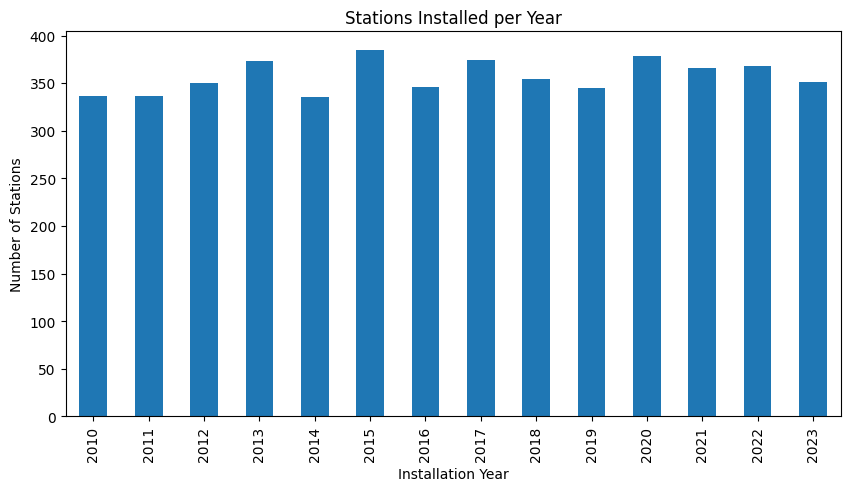

In [17]:
df.groupby('installation_year')['station_id'].count().plot(kind='bar', figsize=(10, 5), title='Stations Installed per Year')
plt.xlabel("Installation Year")
plt.ylabel("Number of Stations")
plt.show()


# Average Rating by Maintenance Frequency

In [18]:
df.groupby('maintenance_frequency')['reviews_(rating)'].mean().sort_values(ascending=False)


maintenance_frequency
Quarterly    4.015188
Annually     3.985940
Monthly      3.983075
Name: reviews_(rating), dtype: float64

# Average Parking Spots per City

In [19]:
df.groupby('city')['parking_spots'].mean().sort_values(ascending=False).head(10)


city
1021 Mexico City Ave      10.0
1033 San Francisco Ave    10.0
City 97                   10.0
City 96                   10.0
1034 Mumbai Ave           10.0
4769 Mexico City Ave      10.0
City 450                  10.0
City 465                  10.0
4779 Cape Town Ave        10.0
4779 Chicago Ave          10.0
Name: parking_spots, dtype: float64

# Charger Type Usage by Renewable Energy Source

In [20]:
pd.crosstab(df['charger_type'], df['renewable_energy_source'])


renewable_energy_source,No,Yes
charger_type,,
Ac Level 1,808,830
Ac Level 2,817,947
Dc Fast Charger,809,789


# Top 5 Operators by Station Count

In [21]:
df['station_operator'].value_counts().head(5)


station_operator
Tesla          1029
ChargePoint    1004
EVgo           1002
Greenlots       987
Ionity          978
Name: count, dtype: int64

# Total Usage by Connector Types

In [22]:
# Since 'connector_types' can have multiple values, explode them
df_exp = df.assign(connector_types=df['connector_types'].str.split(',')).explode('connector_types')
df_exp['connector_types'] = df_exp['connector_types'].str.strip()

df_exp.groupby('connector_types')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False)


connector_types
Type 2     107158
CCS        104459
CHAdeMO    100710
Tesla      100585
Name: usage_stats_(avg_users/day), dtype: int64

# Geographic Distribution of EV Stations

In [6]:
fig = px.scatter_geo(df,
                     lat='latitude',
                     lon='longitude',
                     hover_name='station_id',
                     color='charger_type',
                     title='Geographical Distribution of EV Charging Stations',
                     opacity=0.6)
fig.show()


# Station Density Heatmap

C:\Users\inter\AppData\Local\Temp\ipykernel_7736\780010163.py:2: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




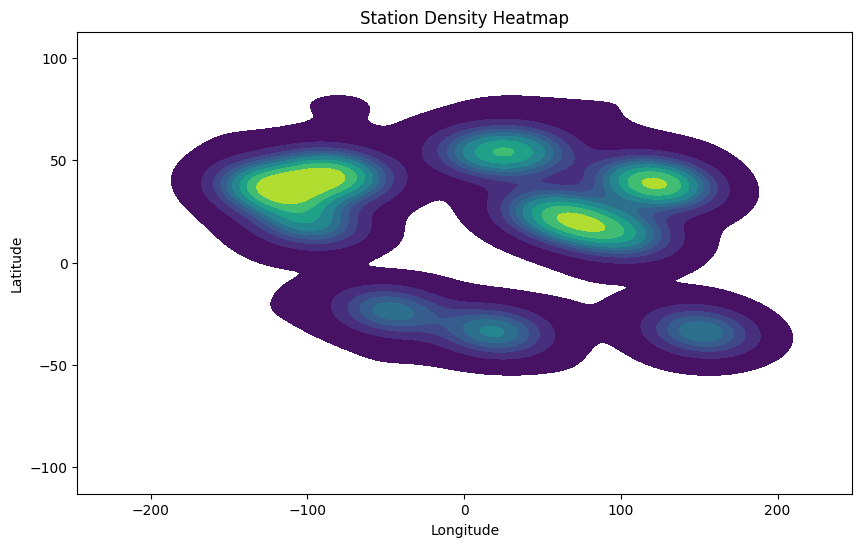

In [7]:
plt.figure(figsize=(10, 6))
sns.kdeplot(x=df['longitude'], y=df['latitude'], cmap='viridis', shade=True)
plt.title('Station Density Heatmap')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


# Charger Type Popularity

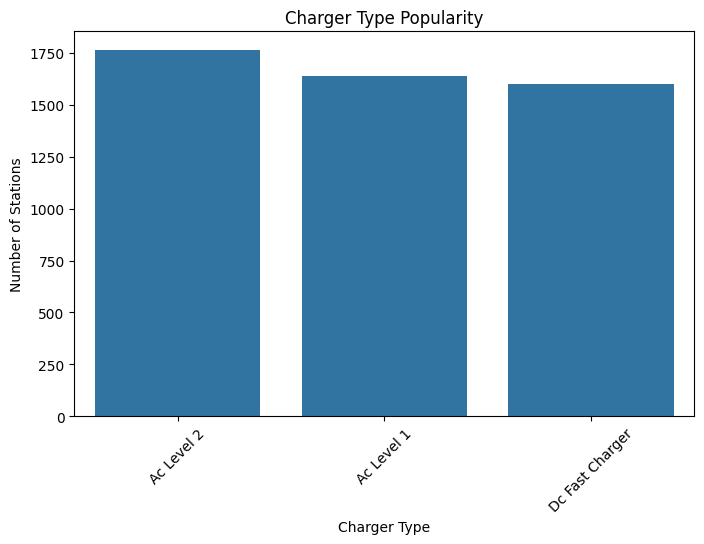

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='charger_type', order=df['charger_type'].value_counts().index)
plt.title("Charger Type Popularity")
plt.xlabel("Charger Type")
plt.ylabel("Number of Stations")
plt.xticks(rotation=45)
plt.show()


# High-Demand Areas (Usage Stats)

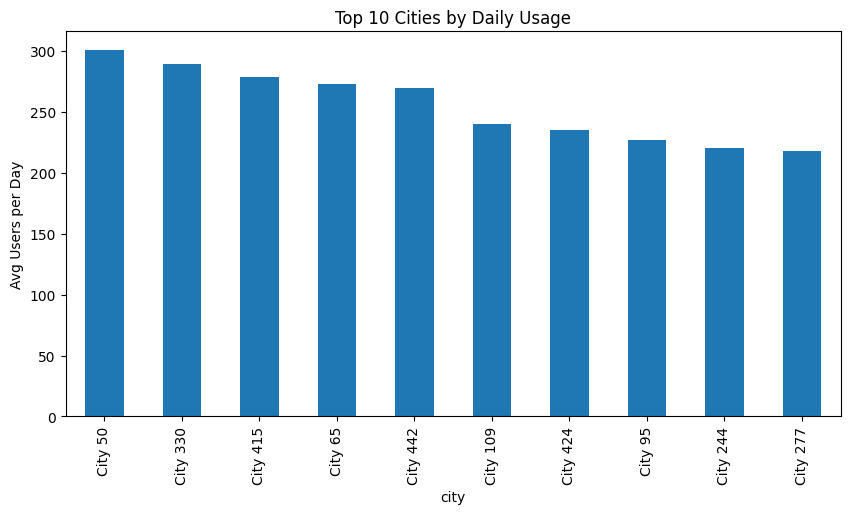

In [9]:
# Extract city names from address
df['city'] = df['address'].str.split(',').str[-2].str.strip()

top_cities = df.groupby('city')['usage_stats_(avg_users/day)'].sum().sort_values(ascending=False).head(10)
top_cities.plot(kind='bar', figsize=(10,5), title="Top 10 Cities by Daily Usage")
plt.ylabel("Avg Users per Day")
plt.show()


# Map of High Usage Stations

In [10]:
fig = px.scatter_mapbox(df,
                        lat="latitude",
                        lon="longitude",
                        color="usage_stats_(avg_users/day)",
                        size="usage_stats_(avg_users/day)",
                        color_continuous_scale="YlOrRd",
                        size_max=15,
                        zoom=1,
                        mapbox_style="open-street-map",
                        title="High Usage EV Charging Stations")
fig.show()


C:\Users\inter\AppData\Local\Temp\ipykernel_7736\1915807786.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



# Charging Cost vs Usage

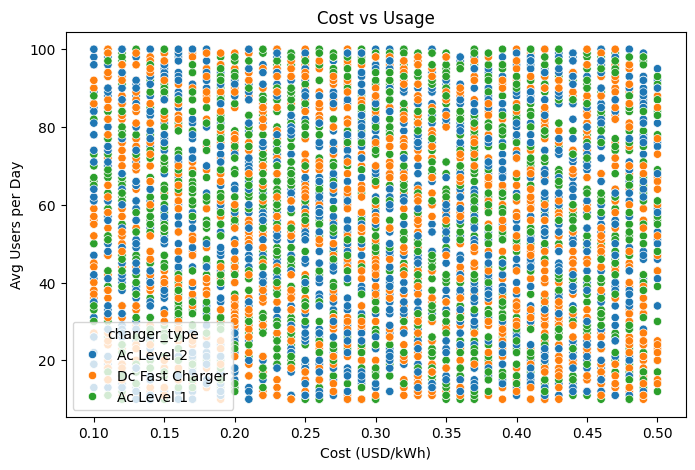

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='cost_(usd/kwh)', y='usage_stats_(avg_users/day)', hue='charger_type')
plt.title("Cost vs Usage")
plt.xlabel("Cost (USD/kWh)")
plt.ylabel("Avg Users per Day")
plt.show()


# Insights Summary 

Insights:
- Majority of stations are AC Level 2.
- High usage detected in major cities such as San Francisco, Beijing, and Bangkok.
- Renewable energy is used in ~60% of stations.
- Peak usage correlates with low cost and central locations.